In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson

seasons = ['1112','1213','1314','1415','1516','1617','1718']
columns = ['Season','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']
df = pd.DataFrame(columns=columns)
for season in seasons:
    df_ = pd.read_csv("http://www.football-data.co.uk/mmz4281/" + season + "/I1.csv",
                     parse_dates=['Date'], dayfirst=True)
    df_.dropna(how='all', inplace=True) # removes empty rows (and columns)
    df_['Season'] = season
    df_ = df_[['Season','Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR']]
    df = df.append(df_).reset_index(drop=True)

df.head()

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1112,2011-09-09,Milan,Lazio,2,2,D
1,1112,2011-09-10,Cesena,Napoli,1,3,A
2,1112,2011-09-11,Catania,Siena,0,0,D
3,1112,2011-09-11,Chievo,Novara,2,2,D
4,1112,2011-09-11,Fiorentina,Bologna,2,0,H


In [2]:
df.groupby(['Season']).size()

Season
1112    380
1213    380
1314    380
1415    380
1516    380
1617    380
1718    380
dtype: int64

In [45]:
df[(df['Date'] > datetime(2016,8,1))].reset_index(drop=True)

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1617,2016-08-20,Juventus,Fiorentina,2,1,H
1,1617,2016-08-20,Roma,Udinese,4,0,H
2,1617,2016-08-21,Atalanta,Lazio,3,4,A
3,1617,2016-08-21,Bologna,Crotone,1,0,H
4,1617,2016-08-21,Chievo,Inter,2,0,H
5,1617,2016-08-21,Empoli,Sampdoria,0,1,A
6,1617,2016-08-21,Genoa,Cagliari,3,1,H
7,1617,2016-08-21,Milan,Torino,3,2,H
8,1617,2016-08-21,Palermo,Sassuolo,0,1,A
9,1617,2016-08-21,Pescara,Napoli,2,2,D


In [133]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime

goal_model_data = pd.concat([df[['Date','HomeTeam','AwayTeam','FTHG']].assign(
        home=1).rename(columns={'HomeTeam':'team', 'AwayTeam':'opponent', 'FTHG':'goals'}),
                             df[['Date','AwayTeam','HomeTeam','FTAG']].assign(
        home=-1).rename(columns={'AwayTeam':'team', 'HomeTeam':'opponent', 'FTAG':'goals'})])
goal_model_data['goals'] = goal_model_data['goals'].astype(int)

predict_dates = [i for i in sorted(set(goal_model_data['Date'])) 
     if i > datetime(2016,8,1)]

df_test = df[(df['Date'] > datetime(2016,8,1))].reset_index(drop=True)
lambda_ = np.empty(0)
mu = np.empty(0)

for date in predict_dates:
    poisson_model = smf.glm(formula="goals ~ home + team + opponent", 
                data=goal_model_data[goal_model_data['Date'] < date],
                family=sm.families.Poisson()).fit()
    
    df_test_h = df_test[['Date','HomeTeam','AwayTeam','FTHG']][df_test['Date'] == date].assign(
           home=1).rename(columns={'HomeTeam':'team', 'AwayTeam':'opponent'}).reset_index(drop=True)
   
    df_test_a = df_test[['Date','HomeTeam','AwayTeam','FTHG']][df_test['Date'] == date].assign(
           home=-1).rename(columns={'HomeTeam':'opponent', 'AwayTeam':'team'}).reset_index(drop=True)
    
    for row in range(df_test_h.shape[0]):
        if df_test_h['team'][row] in set(goal_model_data[goal_model_data['Date'] < date]['team']):
            if df_test_h['opponent'][row] in set(goal_model_data[goal_model_data['Date'] < date]['team']):
                lambda_ = np.append(lambda_, poisson_model.predict(df_test_h.iloc[row:row+1]))
                mu = np.append(mu, poisson_model.predict(df_test_a.iloc[row:row+1]))
            else:
                lambda_ = np.append(lambda_, np.NaN)
                mu = np.append(mu, np.NaN)
        else:
            lambda_ = np.append(lambda_, np.NaN)
            mu = np.append(mu, np.NaN)

df_test['lambda_'] = lambda_
df_test['mu'] = mu

df_test

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,lambda_,mu
0,1617,2016-08-20,Juventus,Fiorentina,2,1,H,1.880306e+00,0.604110
1,1617,2016-08-20,Roma,Udinese,4,0,H,2.033807e+00,0.899746
2,1617,2016-08-21,Atalanta,Lazio,3,4,A,1.133787e+00,1.290783
3,1617,2016-08-21,Bologna,Crotone,1,0,H,NaN,NaN
4,1617,2016-08-21,Chievo,Inter,2,0,H,1.006746e+00,1.199004
5,1617,2016-08-21,Empoli,Sampdoria,0,1,A,1.375179e+00,1.056766
6,1617,2016-08-21,Genoa,Cagliari,3,1,H,1.557842e+00,0.979406
7,1617,2016-08-21,Milan,Torino,3,2,H,1.814958e+00,1.001006
8,1617,2016-08-21,Palermo,Sassuolo,0,1,A,1.483083e+00,1.262954
9,1617,2016-08-21,Pescara,Napoli,2,2,D,7.093755e-01,2.722729


In [167]:
def create_obs_matrix(data):
    home_goals = data['FTHG']
    away_goals = data['FTAG']
    coords = np.column_stack((home_goals, away_goals))
    obs_matrix = np.zeros([10,10])
    for i in range(coords.shape[0]):
        obs_matrix[coords[i,0],coords[i,1]] += 1
    return obs_matrix

obs_matrix = create_obs_matrix(df_test[~np.isnan(df_test['lambda_'])].reset_index(drop=True))
obs_matrix

array([[46., 65., 32., 21.,  6.,  7.,  0.,  0.,  0.,  0.],
       [69., 82., 52., 28.,  8.,  2.,  0.,  1.,  0.,  0.],
       [45., 74., 30., 14.,  5.,  1.,  2.,  0.,  0.,  0.],
       [41., 36., 18.,  4.,  3.,  2.,  0.,  0.,  0.,  0.],
       [15., 21.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  5.,  2.,  3.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [170]:
def pred_matrix_one_game(data, homeTeam, awayTeam, max_goals=9):
    
    home_goals_avg = data.loc[(data['HomeTeam'] == homeTeam) & (data['AwayTeam'] == awayTeam)]['lambda_'].values[0]
    away_goals_avg = data.loc[(data['HomeTeam'] == homeTeam) & (data['AwayTeam'] == awayTeam)]['mu'].values[0]

    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    return np.outer(np.array(team_pred[0]), np.array(team_pred[1]))

def pred_matrix_all_games(data):
    pred_matrix = np.zeros([10,10])
    for i in range(data.shape[0]):
        add_matrix = pred_matrix_one_game(data, data['HomeTeam'][i], data['AwayTeam'][i], max_goals=9)
        pred_matrix += add_matrix
    return pred_matrix

pred_matrix = pred_matrix_all_games(df_test[~np.isnan(df_test['lambda_'])].reset_index(drop=True))
pred_matrix

array([[5.75751913e+01, 6.44721996e+01, 4.09645470e+01, 1.91525588e+01,
        7.38511882e+00, 2.50116838e+00, 7.73219735e-01, 2.23225517e-01,
        6.08676594e-02, 1.57311368e-02],
       [7.82692372e+01, 8.17771779e+01, 4.77958608e+01, 2.05025057e+01,
        7.21126941e+00, 2.21354645e+00, 6.17941993e-01, 1.61488562e-01,
        4.02628426e-02, 9.67027360e-03],
       [6.13972728e+01, 5.90355317e+01, 3.19658232e+01, 1.27270854e+01,
        4.14953797e+00, 1.17656655e+00, 3.02019196e-01, 7.23267897e-02,
        1.65349570e-02, 3.66617622e-03],
       [3.54641459e+01, 3.14213934e+01, 1.58064817e+01, 5.87063959e+00,
        1.78784962e+00, 4.73087615e-01, 1.13012650e-01, 2.50820921e-02,
        5.29457354e-03, 1.08333956e-03],
       [1.68307011e+01, 1.37450827e+01, 6.42717821e+00, 2.22950838e+00,
        6.35774475e-01, 1.57661879e-01, 3.52660017e-02, 7.30937031e-03,
        1.43500090e-03, 2.71993437e-04],
       [6.95484475e+00, 5.23734150e+00, 2.27724977e+00, 7.37888164e-01,
   

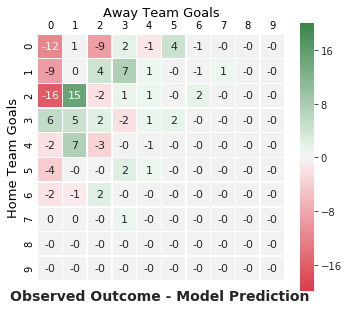

In [172]:
cmap = sns.diverging_palette(10, 133, as_cmap=True)

fig, ax = plt.subplots(figsize=(5,5))  
with sns.axes_style("white"):
    ax = sns.heatmap(obs_matrix-pred_matrix, annot=True, fmt='.0f', cmap=cmap, vmin=-20, vmax=20, center=0.00,
                square=True, linewidths=.5, annot_kws={"size": 11}, cbar_kws={"shrink": .8})
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.grid(which='major', axis='both', linestyle='')
    ax.set_xlabel('Away Team Goals', fontsize=13)
    ax.set_ylabel('Home Team Goals', fontsize=13)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_ticks_position('top')
    plt.figtext(0.45, 0.1, 'Observed Outcome - Model Prediction', horizontalalignment='center',
                fontsize=14, multialignment='left', fontweight='bold')
plt.tight_layout()
plt.show()

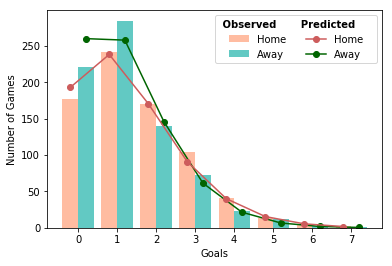

In [173]:
bars = 8
ind = np.arange(bars) # the x locations for the bars
width = 0.4 # the width of the bars

fig, ax = plt.subplots()

# plot bar chart of observed goals
rects1 = ax.bar(ind, np.sum(obs_matrix, axis=1)[:8], width, color='#FFA07A', alpha=0.7)
rects2 = ax.bar(ind + width, np.sum(obs_matrix, axis=0)[:8], width, color='#20B2AA', alpha=0.7)

# add lines for model predictions
line1 = ax.plot([i-0.6 for i in range(1,9)], np.sum(pred_matrix, axis=0)[:8],
                  linestyle='-', marker='o',label="Home", color = '#006400')
line2 = ax.plot([i-1 for i in range(1,9)], np.sum(pred_matrix, axis=1)[:8],
                  linestyle='-', marker='o',label="Away", color = '#CD5C5C')

ax.set_ylabel('Number of Games')
ax.set_xlabel('Goals')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('0','1','2','3','4','5','6','7'))

leg = ax.legend((rects1[0], rects2[0], line2[0], line1[0])
                , ('Home', 'Away', 'Home', 'Away'), ncol=2)
leg.set_title(" Observed       Predicted     ", prop = {'size':'10', 'weight':'bold'})

plt.show()

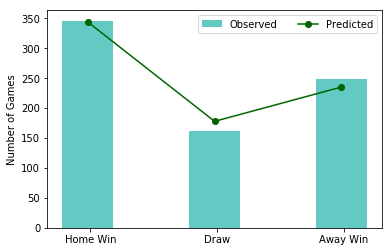

In [174]:
obs_result = np.array([np.sum(np.tril(obs_matrix,-1)), 
                       np.sum(np.diag(obs_matrix)), 
                       np.sum(np.triu(obs_matrix,1))])

pred_result = np.array([np.sum(np.tril(pred_matrix,-1)), 
                        np.sum(np.diag(pred_matrix)), 
                        np.sum(np.triu(pred_matrix,1))])


bars = 3
ind = np.arange(bars) # the x locations for the bars
width = 0.4 # the width of the bars

fig, ax = plt.subplots()

# plot bar chart of observed results
rects1 = ax.bar(ind, obs_result, width, color='#20B2AA', alpha=0.7)

# add lines for model predictions
line1 = ax.plot([i-1 for i in range(1,4)], pred_result,
                  linestyle='-', marker='o',label="Home", color = '#006400')


ax.set_ylabel('Number of Games')
ax.set_xticks(ind + width / 20)
ax.set_xticklabels(('Home Win','Draw','Away Win'))

leg = ax.legend((rects1[0], line1[0]), ('Observed', 'Predicted'), ncol=2)

plt.show()

In [177]:
def prediction_probabilities(data, pred_matrix):
    pp = np.zeros([data.shape[0],3]) # 3 outcomes (home, draw, away)
    for i in range(data.shape[0]):
        pred_matrix = pred_matrix_one_game(data, data['HomeTeam'].loc[i], data['AwayTeam'].loc[i], max_goals=9)
        pp[i,0] = np.sum(np.tril(pred_matrix,-1)) # home win
        pp[i,1] = np.sum(np.diag(pred_matrix)) # draw
        pp[i,2] = np.sum(np.triu(pred_matrix,1)) # away win
    return pp


def ranked_probability_score(predictions, observed):
    observed = observed.where(observed != 'H', 0).where(observed != 'D', 1).where(observed != 'A', 2)

    num_outcomes = predictions.shape[1] # 3 outcomes: home win, draw, away win
    num_predictions = predictions.shape[0] # number of matches in test set

    rps = np.zeros(num_predictions)
    for i in range(num_predictions):
        obs_lookup = np.zeros(num_outcomes)
        obs_lookup[observed[i]] = 1 # mark the observed result in the row vector (1,0,0) = home win
        sigma_i = 0
        for j in range(num_outcomes):
            sigma_j = (np.sum(predictions[i,0:j]) - np.sum(obs_lookup[0:j]))**2
            sigma_i += sigma_j
        rps[i] = (1/(num_outcomes-1))*sigma_i

    return rps

pp = prediction_probabilities(data=df_test, pred_matrix=pred_matrix)
rps = ranked_probability_score(predictions=pp, observed=df_test['FTR'])

np.nanmean(rps)

0.18839527904869044

In [178]:
df_test['RPS'] = rps

df_test['RPS'].groupby(df_test['Season']).mean()

Season
1617    0.187631
1718    0.189164
Name: RPS, dtype: float64